# 인천공항 이용자 수 분석 및 예측

- https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DA_2%26obj_var_id%3D%26seqNo%3D%26tblId%3DDT_1B28024%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D101%26
- 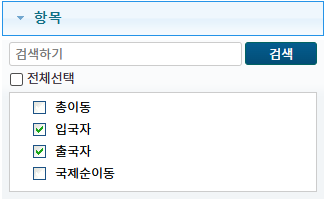
- 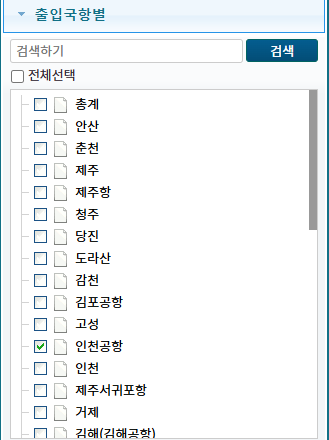
- 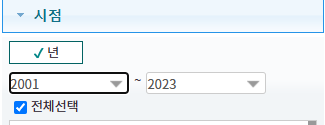

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path = './ref/출입국항구내외국인성별국제이동연간20250305.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [3]:
ex1_data = ori.copy()
ex1_data.columns = ['airport','type1','gender','year','type2','value']
# ex1_data.rename(columns={'출입국항별':'airport'})
# 모든 컬럼을 한꺼번에 변경해야 한다면 → ex1_data.columns = ['']
# 일부 컬럼만 바꾸고 싶다면 → ex1_data.rename(columns={'':''})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
# filter를 사용해서 type1에서 외국인만 뽑아내기

filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()
# ex1_data[filter1]
ex2_data

,airport,type1,gender,year,type2,value
92,인천공항,외국인,남자,2001,입국자,60699
93,인천공항,외국인,남자,2001,출국자,44548
94,인천공항,외국인,남자,2002,입국자,77745
95,인천공항,외국인,남자,2002,출국자,58784
96,인천공항,외국인,남자,2003,입국자,85643
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [5]:
#groupby

ex1_data = ex1_data.groupby('year').sum().reset_index()
ex1_data

,year,airport,type1,gender,type2,value
0,2001,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,521210
1,2002,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,697631
2,2003,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,747272
3,2004,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,769912
4,2005,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,991717
5,2006,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,996275
6,2007,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,1012415
7,2008,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,1080247
8,2009,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,1009778
9,2010,인천공항인천공항인천공항인천공항인천공항인천공항인천공항인천공항,내국인내국인내국인내국인외국인외국인외국인외국인,남자남자여자여자남자남자여자여자,입국자출국자입국자출국자입국자출국자입국자출국자,1019086


In [6]:
# groupby('year')['value'] → 그룹화 후 특정 열을 선택할 때 사용.
# groupby('year')→ ex1_data의 데이터를 'year' 열을 기준으로 그룹화한다. 같은 'year' 값을 가진 행들끼리 묶인다.
# ['value']→ 그룹화된 데이터에서 'value' 열만 선택한다. 즉, 그룹별 'value' 열의 값들만 남긴다.
# .reset_index(name='total')→ groupby를 사용하면 'year'가 인덱스로 설정되는데, 이를 다시 일반 열로 변환한다.
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data.head()

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717


In [7]:
# filter2 = ex2_data['type2']=='입국자'
# ex2_data = ex2_data[filter2]
# ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name='total')
# ex2_data

In [8]:
# filter3 = ex2_data['type2']=='출국자'
# ex3_data = ex2_data[filter3]
# ex3_data = ex3_data.groupby('year')['value'].sum().reset_index(name='total')

filter2 = ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

In [9]:
ex3_data

,year,total
0,2001,72896
1,2002,97493
2,2003,134088
3,2004,123698
4,2005,229675
5,2006,145644
6,2007,127230
7,2008,174604
8,2009,201288
9,2010,163777


In [11]:
d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
matplotlib.rcParams['font.family']='D2Coding'

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
21    2022
22    2023
Name: year, dtype: int64


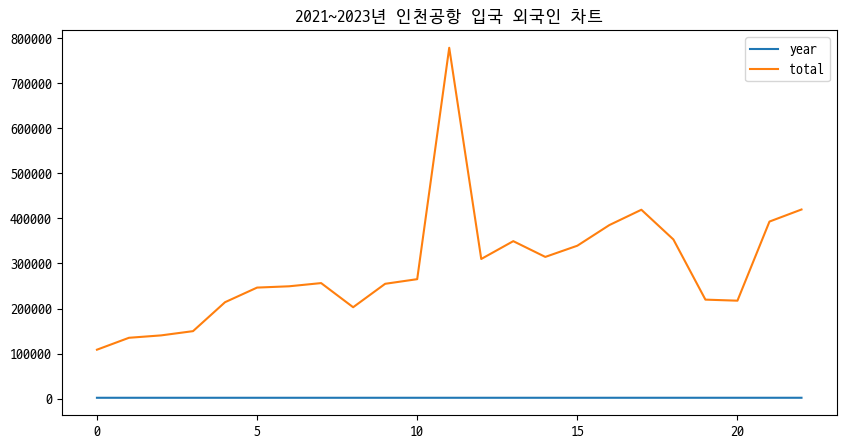

In [30]:
ex2_data.plot(figsize=(10,5), title='2021~2023년 인천공항 입국 외국인 차트')
print(x_data)
x_data = ex2_data['year']
plt.show()

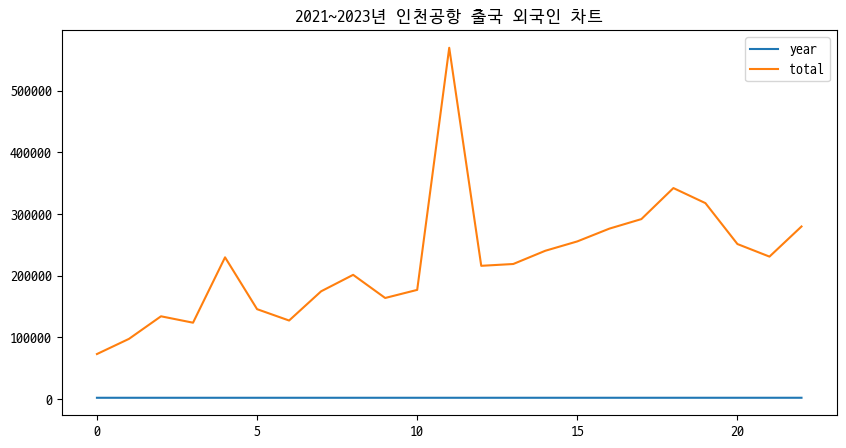

In [19]:
ex3_data.plot(figsize=(10,5), title='2021~2023년 인천공항 출국 외국인 차트')

plt.show()